In [6]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
from allison.nn.layers import LayerDense
from allison.nn.models import NeuralNetwork
from allison.utils.functions.data import train_test_split
from allison.utils.functions.loss import categorical_cross_entropy
from allison.utils.functions.activation import sigmoid, softmax
from allison.utils.metrics import accuracy
from allison.utils.functions.transforms import get_numeric_labels

Making Dataset

In [7]:
df=pd.read_csv("../data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Split data for train and test

In [8]:
data_train, data_test = train_test_split(df,0.7)

Selecting features and labels

In [9]:
features = df.columns[1:5].tolist()
labels = df.columns[5]

Train data

In [10]:
features_train = data_train[features].to_numpy()
labels_train=pd.get_dummies(data_train[labels]).to_numpy()
print(features_train.shape,labels_train.shape)

(98, 4) (98, 3)


Test data

In [11]:
features_test = data_test[features].to_numpy()
labels_test=pd.get_dummies(data_test[labels]).to_numpy()
print(features_test.shape,labels_test.shape)

(52, 4) (52, 3)


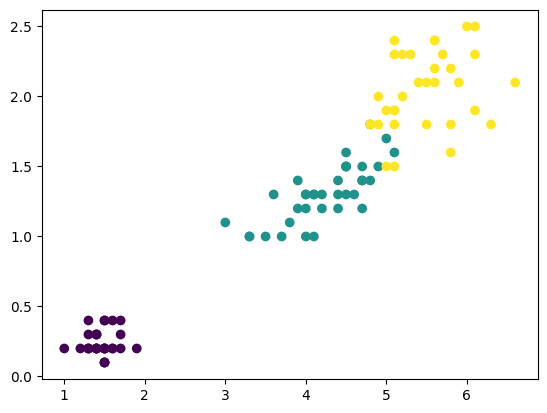

In [12]:
plt.scatter(features_train[:,2],features_train[:,3],c=get_numeric_labels(labels_train))

Building the Neural Network

In [13]:
model = NeuralNetwork(categorical_cross_entropy,accuracy, 0.0015)
model.add_layer(LayerDense(6,4,sigmoid))
model.add_layer(LayerDense(3,6,softmax))
model.summary()

Layer:1, neurons:6, input:(n,4), weights:(4,6), output:(n,6), activation:sigmoid 

Layer:2, neurons:3, input:(n,6), weights:(6,3), output:(n,3), activation:softmax 

Total -> Layers:2, neurons:9, weights:42, bias:9 params:51 

Loss function: categorical_cross_entropy 

Metric: accuracy 

Learning Rate: 0.0015 



Training

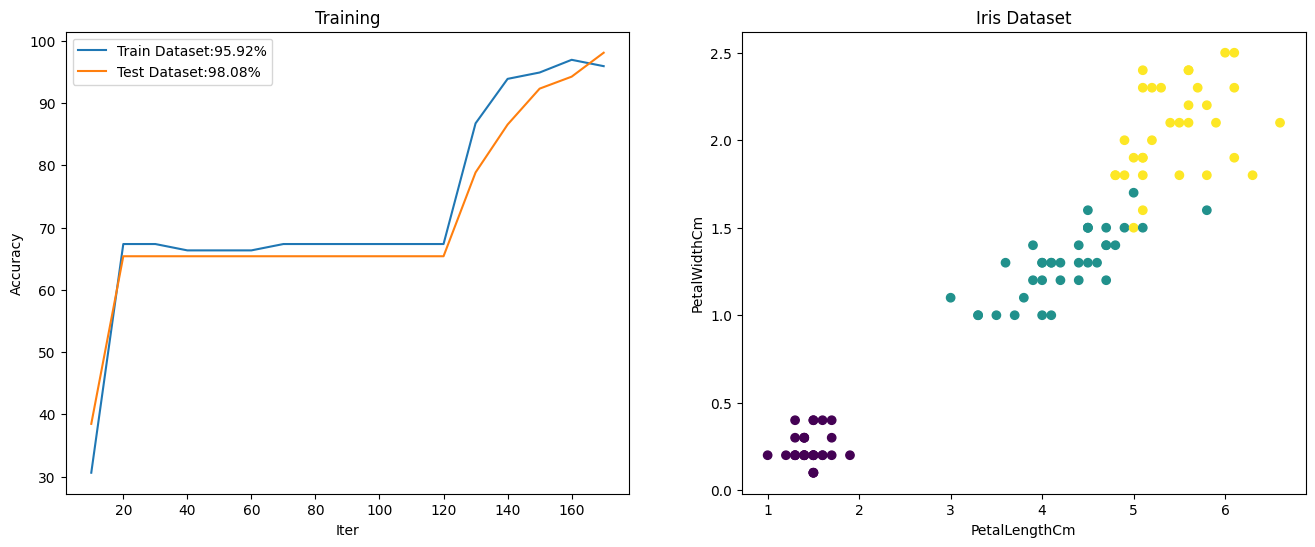

In [14]:
iters_list=[]
evals_train=[]
evals_test=[]

steps = 150
iters = 10

accuracy_train = 0
accuracy_test = 0

for step in range(1,steps+1):
    if accuracy_train > 95.0 and accuracy_test > 95.0:
        break
    model.train(features_train,labels_train,iters,False)
    accuracy_train = model.evaluate(features_train,labels_train)
    accuracy_test = model.evaluate(features_test,labels_test)

    iters_list.append(step*iters)
    evals_train.append(accuracy_train)
    evals_test.append(accuracy_test)

    predictions = model.predict(features_train)
    predictions = get_numeric_labels(predictions)

    fig,(fig1,fig2) = plt.subplots(1,2,figsize=(16,6))
    fig1.plot(iters_list,evals_train,label=f"Train Dataset:{evals_train[-1]:.2f}%")
    fig1.plot(iters_list,evals_test,label=f"Test Dataset:{evals_test[-1]:.2f}%")
    fig1.set_title("Training")
    fig1.set_xlabel("Iter")
    fig1.set_ylabel("Accuracy")
    fig1.legend(loc="upper left")
    fig2.scatter(features_train[:,2],features_train[:,3], c = predictions)
    fig2.set_title("Iris Dataset")
    fig2.set_xlabel(features[2])
    fig2.set_ylabel(features[3])
    plt.show()
    clear_output(wait=True)